# M3: Time Series Decomposition Assignment

### By: Joshua Aman

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import Data

In [55]:
df = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
df['Month-Year']=pd.to_datetime(df['Month-Year'])
df = df.sort_values('Month-Year')
df = df.reset_index(drop=True)
df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,2020-01-02,59516,45273,14243
1,13,2020-01-03,59877,45473,14404
2,25,2020-01-04,64934,50975,13959
3,37,2020-01-05,71474,57094,14380
4,49,2020-01-06,81058,65339,15719


Public Construction Graph

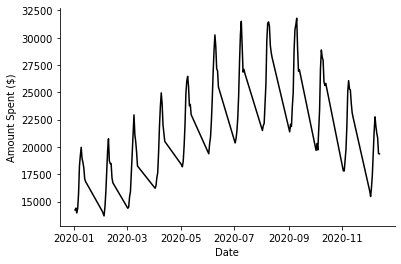

In [57]:
fig,ax = plt.subplots()
ax.plot(df['Month-Year'],df['Public Construction'],label = 'Public Construction', c = 'k')
ax.set_xlabel('Date')
ax.set_ylabel('Amount Spent ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Private Construction Graph

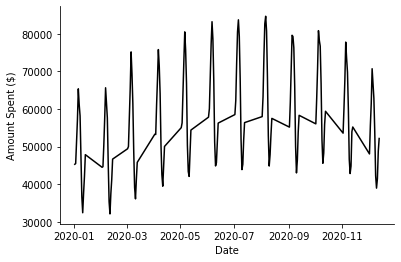

In [58]:
fig,ax = plt.subplots()
ax.plot(df['Month-Year'],df['Private Construction'],label = 'Public Construction', c = 'k')
ax.set_xlabel('Date')
ax.set_ylabel('Amount Spent ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Both Time Series Plots show signs of nonlinear trends. 

In [59]:
def sqErr(row):
    return (row['Public Construction','Private Construction'] - row ['PubMovAvg', 'PriMovAvg'])**2

df['PubMovAvg'] = np.NAN
df['PriMovAvg'] = np.NAN
df['PubSqErr'] = np.NAN
df['PriSqErr'] = np.NAN

df['PubMovAvg'] = df.iloc[:,4].rolling(window=12).mean()
df['PubSqErr'] = (df['Public Construction'] - df['PubMovAvg'])**2
df['PriMovAvg'] = df.iloc[:,3].rolling(window=12).mean()
df['PriSqErr'] = (df['Private Construction'] - df['PriMovAvg'])**2

df.dropna(how='any',inplace=True)

df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction,PubMovAvg,PriMovAvg,PubSqErr,PriSqErr
11,133,2020-01-13,59143,42070,17074,16897.250000,48262.250000,3.124056e+04,3.834396e+07
12,145,2020-01-14,64661,47827,16834,17113.166667,48475.083333,7.793403e+04,4.200120e+05
13,2,2020-02-02,58588,44475,14113,17088.916667,48391.916667,8.856080e+06,1.534224e+07
14,14,2020-02-03,58526,44620,13906,17084.500000,47862.333333,1.010286e+07,1.051273e+07
15,26,2020-02-04,64138,50449,13689,17026.916667,47308.583333,1.114169e+07,9.862217e+06


Public Construction Cumlative Error and Moving Average Plot

10316676.011471193


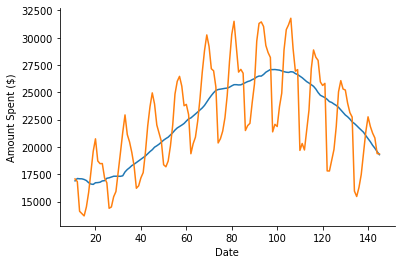

In [69]:
CumPub = (sum(df['PubSqErr']))/len(df['PubSqErr'])
print(CumPub)

fig,ax = plt.subplots()
ax.plot(df['PubMovAvg'], label='Public Moving Average')
ax.plot(df['Public Construction'], label='Public Construction')
ax.set_xlabel('Date')
ax.set_ylabel('Amount Spent ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Private Construction Cumlative Error and Moving Average Plot

142546267.80324075


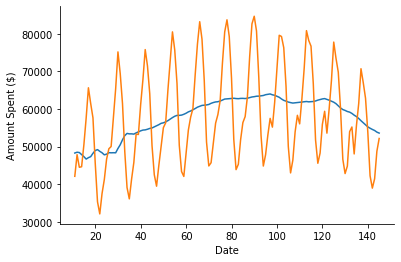

In [70]:
CumPri = (sum(df['PriSqErr']))/len(df['PriSqErr'])
print(CumPri)

fig,ax = plt.subplots()
ax.plot(df['PriMovAvg'], label='Private Moving Average')
ax.plot(df['Private Construction'], label='Private Construction')
ax.set_xlabel('Date')
ax.set_ylabel('Amount Spent ($)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [73]:
df['R1Pub']=df['Public Construction'] - df['PubMovAvg']
df['R2Pub']=abs((df['Public Construction']-df['R1Pub'])/df['Public Construction'])
df['R1Pri']=df['Private Construction'] - df['PriMovAvg']
df['R2Pri']=abs((df['Private Construction']-df['R1Pri'])/df['Private Construction'])
df.style.format({
    'PubMovAvg': '{:.1f}'.format,
    'PriMovAvg': '{:.1f}'.format,
    'PubSqAvg': '{:.1f}'.format,
    'PriSqAvg': '{:.1f}'.format,
    'R1Pub': '{:.1f}'.format,
    'R1Pri': '{:.3f}'.format,
    'R2Pub': '{:.1f}'.format,
    'R2Pri': '{:.3f}'.format,
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,PubMovAvg,PriMovAvg,PubSqErr,PriSqErr,R1Pub,R2Pub,R1Pri,R2Pri
11,133,2020-01-13 00:00:00,59143,42070,17074,16897.2,48262.2,31240.6,3.8344e+07,176.8,1.0,-6192.250,1.147
12,145,2020-01-14 00:00:00,64661,47827,16834,17113.2,48475.1,77934,420012,-279.2,1.0,-648.083,1.014
13,2,2020-02-02 00:00:00,58588,44475,14113,17088.9,48391.9,8.85608e+06,1.53422e+07,-2975.9,1.2,-3916.917,1.088
14,14,2020-02-03 00:00:00,58526,44620,13906,17084.5,47862.3,1.01029e+07,1.05127e+07,-3178.5,1.2,-3242.333,1.073
15,26,2020-02-04 00:00:00,64138,50449,13689,17026.9,47308.6,1.11417e+07,9.86222e+06,-3337.9,1.2,3140.417,0.938
16,38,2020-02-05 00:00:00,72048,57531,14517,16926.8,46657.9,5.8069e+06,1.18224e+08,-2409.8,1.2,10873.083,0.811
17,50,2020-02-06 00:00:00,81478,65622,15857,16727.8,47029.7,758206,3.45675e+08,-870.8,1.1,18592.333,0.717
18,62,2020-02-07 00:00:00,79177,61437,17740,16606.2,47303.6,1.28558e+06,1.99753e+08,1133.8,0.9,14133.417,0.770
19,74,2020-02-08 00:00:00,77227,57625,19602,16575.4,48191.2,9.16021e+06,8.89972e+07,3026.6,0.8,9433.833,0.836
20,86,2020-02-09 00:00:00,66296,45548,20748,16726.4,48932.7,1.61731e+07,1.1456e+07,4021.6,0.8,-3384.667,1.074
